In [19]:
import numpy as np
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [63]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = np.reshape(x_train, newshape=(x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, newshape=(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

c:\users\naitik dodia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
mean_vec = np.mean(x_train, axis=0)
cov_mat = (x_train - mean_vec).T.dot(x_train - mean_vec)/(x_train.shape[0]-1)


In [9]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [31]:
cov_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda eig_pairs: eig_pairs[0],reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
40.48763510846792
29.241697518949625
26.81180448621752
20.68661822000405
18.07665012343707
15.733177866400622
13.790609093486072
12.517589094135092
11.006795270542082
10.050497052250826
9.62045779343629
8.630973555526765
7.991596865094799
7.814882145374783
7.375537858883233
7.130587505186905
6.713980018772299
6.604007488656931
6.406048463263041
6.237377432789704
5.9322917180472015
5.760598548469536
5.484033638105974
5.318597209624169
5.128735342290203
4.960624458681203
4.905336616858252
4.7084349702749755
4.529197596408136
4.394708491755622
4.275221721532825
4.21399693351331
4.098380789693205
4.0318113729939515
3.977136242957232
3.860524085232893
3.8086402073914254
3.725634258016687
3.6439354278070213
3.4416973042172803
3.416245166830108
3.3637852743017476
3.2577363106528168
3.236203226179829
3.2047809989622853
3.17911020964197
3.1420572768009922
3.0858885877985296
3.060765560327005
3.0375997399468977
2.901719551936549
2.864085617837613
2.84980787029232

In [15]:
tot = np.sum(eig_vals)

var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

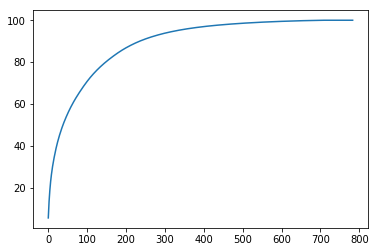

In [20]:
plt.plot(cum_var_exp)

In [47]:
k = 0
k_eig_vec = []
variance_covered = 0
for pair in eig_pairs:
    k = k+1
    k_eig_vec.append(pair[1])
    variance_covered = variance_covered + pair[0]/tot
    if(variance_covered>=0.95):
        break

In [50]:
k_eig_vec = np.array(k_eig_vec)

In [53]:
k_eig_vec.shape

(784, 331)

In [52]:
k_eig_vec = k_eig_vec.T

In [54]:
new_x_train = x_train.dot(k_eig_vec)
new_x_train.shape

(60000, 331)

In [75]:
new_x_test = x_test.dot(k_eig_vec)
new_x_test.shape

(10000, 331)

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

In [57]:
batch_size = 128
num_classes = 10
epochs = 20

In [67]:
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation = 'relu', input_shape = input_shape))
    model.add(Dense(num_classes, activation = 'softmax'))
    return model

In [68]:
model1 = create_model(x_train.shape[1:])
model2 = create_model(new_x_train.shape[1:])

In [72]:
model1.compile(loss = 'categorical_crossentropy', optimizer = SGD(), metrics = ['accuracy'])
model2.compile(loss = 'categorical_crossentropy', optimizer = SGD(), metrics = ['accuracy'])

In [70]:
history1 = model1.fit(x_train, y_train,
                   batch_size = batch_size,
                    epochs = epochs,
                   verbose = 1,
                   validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.7695 - acc: 0.7885 - val_loss: 0.3973 - val_acc: 0.8920
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3528 - acc: 0.9026 - val_loss: 0.3047 - val_acc: 0.9142
Epoch 3/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2844 - acc: 0.9197 - val_loss: 0.2650 - val_acc: 0.9241
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2489 - acc: 0.9291 - val_loss: 0.2419 - val_acc: 0.9313
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2254 - acc: 0.9357 - val_loss: 0.2250 - val_acc: 0.9352
Epoch 6/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2080 - acc: 0.9411 - val_loss: 0.2127 - val_acc: 0.9379
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1942 - acc: 0.9448 - val_loss: 0.2031 - val_acc

In [76]:
history2 = model2.fit(new_x_train, y_train,
                   batch_size = batch_size,
                    epochs = epochs,
                   verbose = 1,
                   validation_data = (new_x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.7718 - acc: 0.7844 - val_loss: 0.4125 - val_acc: 0.8884
Epoch 2/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.3711 - acc: 0.8982 - val_loss: 0.3201 - val_acc: 0.9113
Epoch 3/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.3027 - acc: 0.9158 - val_loss: 0.2790 - val_acc: 0.9220
Epoch 4/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2659 - acc: 0.9255 - val_loss: 0.2544 - val_acc: 0.9279
Epoch 5/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2412 - acc: 0.9322 - val_loss: 0.2371 - val_acc: 0.9326
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.2229 - acc: 0.9371 - val_loss: 0.2242 - val_acc: 0.9364
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2080 - acc: 0.9414 - val_loss: 0.2137 - val_acc

In [78]:
model1.save('one_hidden_layer_mnist.h5')
model2.save('pca_for_mnist.h5')